In [1]:

import v1_bmtk_simulate 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Apr  7 2025 08:14:35

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [109]:
import pandas as pd
import h5py
import seaborn as sns

In [110]:
def spikes_dataf(spikes_h5):
    with h5py.File(spikes_h5) as sfx:
        sfspikes = sfx['/spikes/v1']
        snodes = sfspikes['node_ids']
        stimes = sfspikes['timestamps']
        return pd.DataFrame(data={
            'node_id':snodes[:snodes.len()],
            'timestamp':stimes[:stimes.len()]
        })
    return None


def nodes_dataf(nodes_h5):
    with h5py.File(nodes_h5) as vifx:
        ntypes = vifx['/nodes/v1/node_type_id']
        nyes = vifx['/nodes/v1/0/y']
        nids = vifx['/nodes/v1/node_id']
        return pd.DataFrame(data={
            'node_id':nids[:nids.len()],
            'y':nyes[:nyes.len()],
            'node_type_id': ntypes[:ntypes.len()]
        })

def node_types_dataf(nodes_types_csv):
    ntypesdf = pd.read_csv(nodes_types_csv, sep=' ')
    ntypesdf['layer'] = ntypesdf['pop_name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.split(',').str[0]
    ntypesdf['cell_type'] = ntypesdf['pop_name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.split(',').str[-1]
    return ntypesdf[['node_type_id', 'ei', 'location','pop_name', 'layer', 'cell_type']]
    
    

In [116]:
v1_bmtk_simulate.main("./model_builds/v1030/config.json", 16)

2025-05-27 15:07:53,493 [INFO] Created log file
2025-05-27 15:07:53,824 [INFO] Batch processing nodes for v1/0.
2025-05-27 15:07:53,954 [INFO] Batch processing nodes for lgn/0.
2025-05-27 15:07:53,973 [INFO] Batch processing nodes for bkg/0.
2025-05-27 15:07:55,060 [INFO] Setting up output directory
2025-05-27 15:07:55,063 [INFO] Building cells.
2025-05-27 15:07:56,972 [INFO] Building recurrent connections
2025-05-27 15:08:09,133 [INFO] Network created.
2025-05-27 15:08:09,135 [INFO] Build virtual cell stimulations for LGN_spikes
2025-05-27 15:08:44,329 [INFO] Build virtual cell stimulations for BKG_spikes
2025-05-27 15:08:45,984 [INFO] Starting Simulation
2025-05-27 15:09:04,407 [INFO] Simulation finished, finalizing results.
2025-05-27 15:09:06,758 [INFO] Done.


In [112]:
node_spikes_df = pd.merge(pd.merge(spikes_df, nodes_df), node_types_df)
node_spikes_df

,node_id,timestamp,y,node_type_id,ei,location,pop_name,layer,cell_type
0,244,2754.00,-137.927379,482654108,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
1,570,2079.00,-125.153320,482654108,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
2,570,620.75,-125.153320,482654108,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
3,474,1867.50,-155.788120,482654108,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
4,250,1736.00,-166.479898,482654108,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
...,...,...,...,...,...,...,...,...,...
311480,27240,1844.50,-715.062022,502382506,i,VISp6,"('6', 'Sst')",'6','Sst'
311481,23080,2745.75,-623.279117,591627904,i,VISp5,"('5', 'Vip')",'5','Vip'
311482,23946,2178.25,-800.116409,503286448,e,VISp6,"('6', 'Ntsr1')",'6','Ntsr1'
311483,23946,1151.25,-800.116409,503286448,e,VISp6,"('6', 'Ntsr1')",'6','Ntsr1'


In [111]:
spikes_df = spikes_dataf("./model_builds/v1030/v1/output/spikes.h5")
nodes_df = nodes_dataf("./model_builds/v1030/v1/network/v1_nodes.h5")
node_types_df = node_types_dataf("./model_builds/v1030/v1/network/v1_node_types.csv")

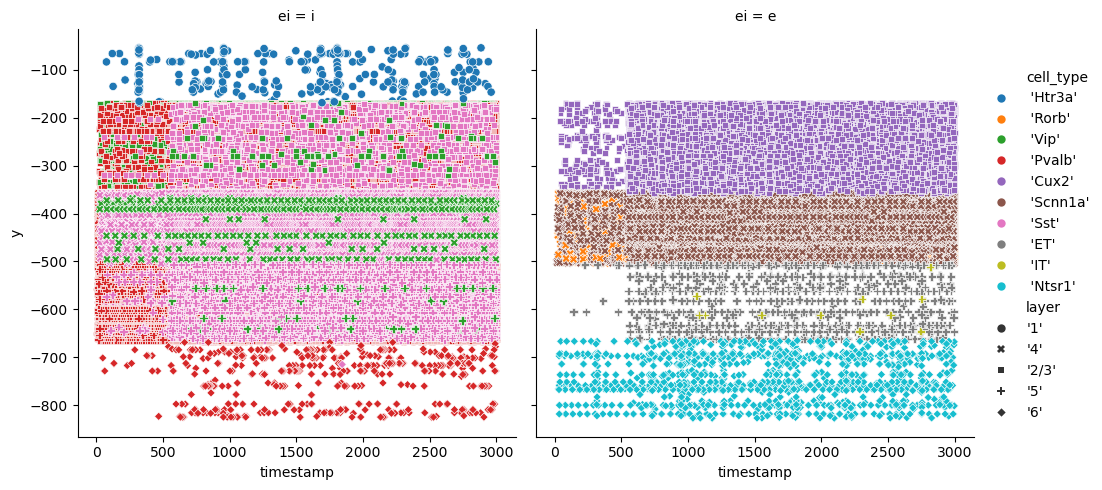

In [114]:
sns.relplot(data=node_spikes_df, x="timestamp", y="y", col="ei", hue="cell_type", style="layer")